In [4]:
import sys

sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

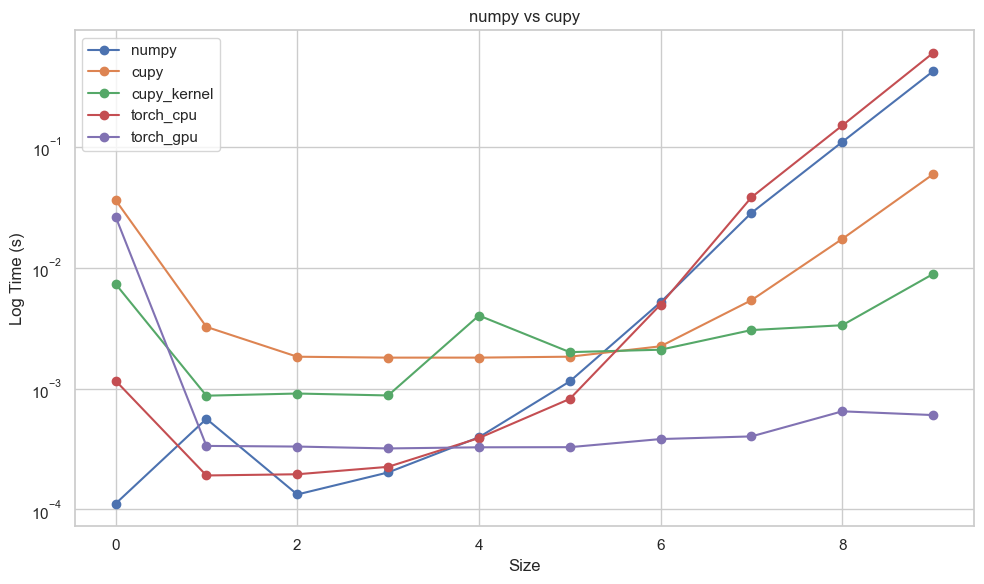

In [30]:
df = pd.read_csv('../results_l2.csv')
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['numpy'], label='numpy', marker='o')
plt.plot(df.index, df['cupy'], label='cupy', marker='o')
plt.plot(df.index, df['cupy_kernel'], label='cupy_kernel', marker='o')
plt.plot(df.index, df['torch_cpu'], label='torch_cpu', marker='o')
plt.plot(df.index, df['torch_gpu'], label='torch_gpu', marker='o')
plt.yscale('log')
plt.title('numpy vs cupy')
plt.xlabel('Size')
plt.ylabel('Log Time (s)')
plt.legend()
plt.tight_layout()
plt.show

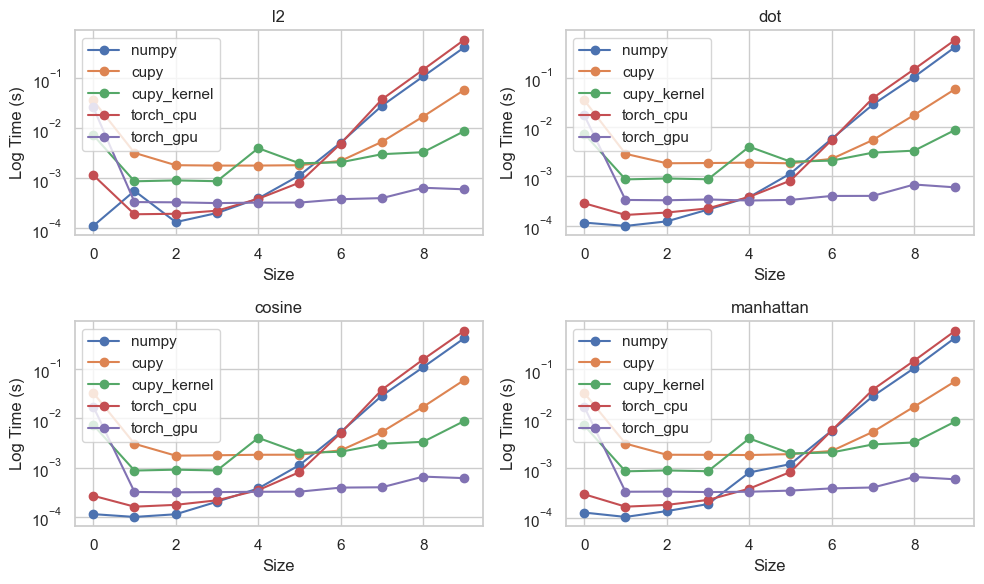

In [32]:
data = {k: pd.read_csv(f'../results_{k}.csv') for k in ['l2', 'dot', 'cosine', 'manhattan']}
# same data as above, plot side by side
plt.figure(figsize=(10, 6))
for i, (k, v) in enumerate(data.items()):
  plt.subplot(2, 2, i + 1)
  plt.plot(v.index, v['numpy'], label='numpy', marker='o')
  plt.plot(v.index, v['cupy'], label='cupy', marker='o')
  plt.plot(df.index, df['cupy_kernel'], label='cupy_kernel', marker='o')
  plt.plot(v.index, v['torch_cpu'], label='torch_cpu', marker='o')
  plt.plot(v.index, v['torch_gpu'], label='torch_gpu', marker='o')
  plt.yscale('log')
  plt.title(k)
  plt.xlabel('Size')
  plt.ylabel('Log Time (s)')
  plt.legend()
plt.tight_layout()
plt.show()